# Introducción

*   Se presenta como problemática la clasificación de flores, explicitamente de tres tipos: Iris Setosa, Iris Virginica e Iris Versicolor.
*   El objetivo del laboratorio es diseñar un clasificador neuronal poco profundo que permita identificar que tipo de flor es en base a cuatro caracteristicas, a saber, largo del sepalo, ancho del sepalo, largo del petalo y ancho del petalo


# Experimentos

*   Se utilizará la base de datos iris.csv 
*   Carga de datos
*   Separacion de los datos: Conjunto de entrenamiento, conjunto de prueba y conjunto de validación
*   Diseño del modelo
* Entrenamiento
* Validación

## Carga de la base de datos

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


## Diseño del modelo propuesto

Se presenta una red neuronal poco profunda que cuenta con 3 capas (Ver Tabla 1), la primera capa cuenta con 4 entradas de acuerdo a la cantidad de caracteristicas de entrada que nos proporciona la base de datos, el numero de salidas de dicha capa se fundamenta en la cantidad de observaciones del conjunto de entrenamiento. La segunda es una capa oculta que tiene como entrada la salida de la capa anterior y el numero de salidas corresponde a $y_h=x_i\sqrt{x_h *y_f}$ donde $x_h$ es la cantidad de entradas para la capa oculta, $y_f$ la cantidad de salidas de la capa siguiente y $x_i$ la cantidad de entradas iniciales.
<table 
  <tr>
    <th></th>
    <th>Capa 1</th>
    <th>Capa 2</th>
    <th>Capa 3</th>
  </tr>
  <tr>
    <th>N Entradas</th>
    <td>4</td>
    <td>84</td>
    <td>37</td>
  </tr>
  <tr>
    <th>N Salidas</th>
    <td>84</td>
    <td>37</td>
    <td>3</td>
  </tr>
</table>
<center>Tabla 1 .- Capas</center>

## Parámetros y configuración del modelo

* Funcion de Activacion: Relu
* Funcion de Perdida: Cross-Entropy
* Optimizador: Adam
* Tasa de aprendizaje: 0.001


cargar tensores

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
#PyTorch permite trabajar con CUDA para realizar las operaciones en la GPU
torch.cuda.is_available()
cuda0 = torch.device('cuda:0')
torch.cuda.current_device()
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
#PyTorch permite trabajar con CUDA para realizar las operaciones en la GPU
torch.cuda.is_available()
cuda0 = torch.device('cuda:0')
torch.cuda.current_device()
print(torch.cuda.get_device_name(0))
torch.cuda.empty_cache()

Tesla P100-PCIE-16GB


In [ ]:
%time X1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_train/X1_train_tensorp0.pt')
%time X1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_train/X1_train_tensorp1.pt')
%time X1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_train/X1_train_tensorp2.pt')
%time y1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_train/y1_train_tensorp0.pt')
%time y1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_train/y1_train_tensorp1.pt')
%time y1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_train/y1_train_tensorp2.pt')


CPU times: user 3.07 s, sys: 3.17 s, total: 6.24 s
Wall time: 21.1 s
CPU times: user 357 ms, sys: 1.29 s, total: 1.65 s
Wall time: 17.5 s
CPU times: user 304 ms, sys: 1.25 s, total: 1.56 s
Wall time: 26.6 s
CPU times: user 3.51 ms, sys: 8.8 ms, total: 12.3 ms
Wall time: 264 ms
CPU times: user 1.07 ms, sys: 1.07 ms, total: 2.13 ms
Wall time: 191 ms
CPU times: user 2.37 ms, sys: 243 µs, total: 2.61 ms
Wall time: 186 ms


In [ ]:
print(f'{X1_trainp1.shape} {y1_trainp1.shape}')
print(f'{X1_trainp2.shape} {y1_trainp2.shape}')
print(f'{X1_trainp3.shape} {y1_trainp3.shape}')

torch.Size([25000, 20000]) torch.Size([25000, 1])
torch.Size([25000, 20000]) torch.Size([25000, 1])
torch.Size([23783, 20000]) torch.Size([23783, 1])


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K 
def crearModelo():
  K.clear_session( )
  model = Sequential()
  model.add(Dense(64,  activation='relu'))
  model.add(Dense(2,  activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
  return model

# Pruebas y validación

Del conjunto de datos se tiene un total de 150 observaciones, de estas se separan en tres nuevos conjuntos; conjunto de entrenamiento 84 observaciones, conjunto de prueba 30 observaciones y conjunto de validacion 36 observaciones, correspondiendo a un 56%,  20% y 24% respectivamente.

In [ ]:
print(X1_trainp1.shape)
print(X1_trainp2.shape)
print(X1_trainp3.shape)

torch.Size([25000, 20000])
torch.Size([25000, 20000])
torch.Size([23783, 20000])


In [ ]:
print(y1_trainp1.shape)
print(y1_trainp2.shape)
print(y1_trainp3.shape)

torch.Size([25000, 1])
torch.Size([25000, 1])
torch.Size([23783, 1])


In [ ]:
from keras.utils import to_categorical

y1_trainp1 = to_categorical(y1_trainp1.cpu(), num_classes=2)
y1_trainp2 = to_categorical(y1_trainp2.cpu(), num_classes=2)
y1_trainp3 = to_categorical(y1_trainp3.cpu(), num_classes=2)





##Modelo 1

In [ ]:
modelo1  = crearModelo()

In [ ]:
history = modelo1.fit(np.asarray(X1_trainp1.cpu()), np.asarray(y1_trainp1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 4s - loss: 0.3337 - categorical_accuracy: 0.8578
Epoch 2/10
782/782 - 3s - loss: 0.1460 - categorical_accuracy: 0.9460
Epoch 3/10
782/782 - 3s - loss: 0.0942 - categorical_accuracy: 0.9672
Epoch 4/10
782/782 - 3s - loss: 0.0642 - categorical_accuracy: 0.9787
Epoch 5/10
782/782 - 3s - loss: 0.0459 - categorical_accuracy: 0.9856
Epoch 6/10
782/782 - 3s - loss: 0.0322 - categorical_accuracy: 0.9892
Epoch 7/10
782/782 - 3s - loss: 0.0229 - categorical_accuracy: 0.9929
Epoch 8/10
782/782 - 3s - loss: 0.0155 - categorical_accuracy: 0.9954
Epoch 9/10
782/782 - 3s - loss: 0.0112 - categorical_accuracy: 0.9966
Epoch 10/10
782/782 - 3s - loss: 0.0079 - categorical_accuracy: 0.9978


In [ ]:
history = modelo1.fit(np.asarray(X1_trainp2.cpu()), np.asarray(y1_trainp2)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 3s - loss: 0.2446 - categorical_accuracy: 0.9120
Epoch 2/10
782/782 - 3s - loss: 0.1069 - categorical_accuracy: 0.9594
Epoch 3/10
782/782 - 3s - loss: 0.0672 - categorical_accuracy: 0.9764
Epoch 4/10
782/782 - 3s - loss: 0.0439 - categorical_accuracy: 0.9855
Epoch 5/10
782/782 - 3s - loss: 0.0287 - categorical_accuracy: 0.9900
Epoch 6/10
782/782 - 3s - loss: 0.0190 - categorical_accuracy: 0.9932
Epoch 7/10
782/782 - 3s - loss: 0.0130 - categorical_accuracy: 0.9946
Epoch 8/10
782/782 - 3s - loss: 0.0093 - categorical_accuracy: 0.9959
Epoch 9/10
782/782 - 3s - loss: 0.0071 - categorical_accuracy: 0.9965
Epoch 10/10
782/782 - 3s - loss: 0.0056 - categorical_accuracy: 0.9973


In [ ]:
history = modelo1.fit(np.asarray(X1_trainp3.cpu()), np.asarray(y1_trainp3)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
744/744 - 3s - loss: 0.2115 - categorical_accuracy: 0.9277
Epoch 2/10
744/744 - 3s - loss: 0.0887 - categorical_accuracy: 0.9674
Epoch 3/10
744/744 - 3s - loss: 0.0516 - categorical_accuracy: 0.9829
Epoch 4/10
744/744 - 3s - loss: 0.0325 - categorical_accuracy: 0.9902
Epoch 5/10
744/744 - 3s - loss: 0.0217 - categorical_accuracy: 0.9931
Epoch 6/10
744/744 - 3s - loss: 0.0151 - categorical_accuracy: 0.9949
Epoch 7/10
744/744 - 3s - loss: 0.0110 - categorical_accuracy: 0.9956
Epoch 8/10
744/744 - 3s - loss: 0.0082 - categorical_accuracy: 0.9962
Epoch 9/10
744/744 - 3s - loss: 0.0063 - categorical_accuracy: 0.9972
Epoch 10/10
744/744 - 3s - loss: 0.0050 - categorical_accuracy: 0.9979


In [ ]:
modelo1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain60.h5')

In [2]:
from keras.models import load_model
modelo1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain60.h5')

In [3]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp2.pt')
%time X1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_val/X1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_val/X1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_val/X1_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_val/y1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_val/y1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_val/y1_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.39 s, sys: 1.36 s, total: 2.75 s
Wall time: 15.9 s
CPU times: user 211 ms, sys: 479 ms, total: 690 ms
Wall time: 10.3 s
CPU times: user 246 ms, sys: 929 ms, total: 1.18 s
Wall time: 12.6 s
CPU times: user 5.68 ms, sys: 793 µs, total: 6.47 ms
Wall time: 789 ms
CPU times: user 4.83 ms, sys: 355 µs, total: 5.18 ms
Wall time: 804 ms
CPU times: user 4.65 ms, sys: 1.81 ms, total: 6.46 ms
Wall time: 781 ms
CPU times: user 49.3 ms, sys: 1.11 s, total: 1.16 s
Wall time: 14.9 s
CPU times: user 69.2 ms, sys: 1.14 s, total: 1.2 s
Wall time: 15.5 s
CPU times: user 36.9 ms, sys: 1.1 s, total: 1.14 s
Wall time: 13.5 s
CPU times: user 1.86 ms, sys: 4.13 ms, total: 6 ms
Wall time: 815 ms
CPU times: user 5.24 ms, sys: 625 µs, total: 5.86 ms
Wall time: 829 ms
CPU times: user 6.18 ms, sys: 339 µs, total: 6.52 ms
Wall time: 786 ms


In [4]:
from keras.utils import to_categorical
y1_valp1 = to_categorical(y1_valp1.cpu(), num_classes=2)
y1_valp2 = to_categorical(y1_valp2.cpu(), num_classes=2)
y1_valp3 = to_categorical(y1_valp3.cpu(), num_classes=2)

y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

In [5]:
#validacion
import numpy as np
modelo1.evaluate(np.asarray(X1_valp1.cpu()), np.asarray(y1_valp1),verbose=2)
modelo1.evaluate(np.asarray(X1_valp2.cpu()), np.asarray(y1_valp2),verbose=2)
modelo1.evaluate(np.asarray(X1_valp3.cpu()), np.asarray(y1_valp3),verbose=2)

469/469 - 4s - loss: 0.2932 - categorical_accuracy: 0.9362 - 4s/epoch - 8ms/step
469/469 - 1s - loss: 0.3118 - categorical_accuracy: 0.9373 - 1s/epoch - 3ms/step
475/475 - 1s - loss: 0.2915 - categorical_accuracy: 0.9363 - 1s/epoch - 3ms/step


[0.2914636433124542, 0.9362725615501404]

In [6]:
modelo1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain60PostEvaluate.h5')

#####Probando en cada muestra

In [1]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1DenseTrain60PostEvaluate.h5')

######Muestra1

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp2.pt')


CPU times: user 1.23 s, sys: 1.33 s, total: 2.56 s
Wall time: 11.4 s
CPU times: user 185 ms, sys: 515 ms, total: 700 ms
Wall time: 5.24 s
CPU times: user 240 ms, sys: 905 ms, total: 1.14 s
Wall time: 8.95 s
CPU times: user 3.98 ms, sys: 1.08 ms, total: 5.06 ms
Wall time: 571 ms
CPU times: user 4.89 ms, sys: 0 ns, total: 4.89 ms
Wall time: 541 ms
CPU times: user 5.33 ms, sys: 456 µs, total: 5.79 ms
Wall time: 754 ms


In [3]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

989/989 - 6s - 6s/epoch - 6ms/step
31622
acc: 0.9361204224906711
precision: 0.9349291343133275
recall: 0.9328699022941047
f1: 0.9361204224906711


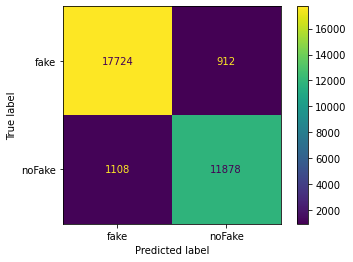

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m1.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra2

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.56 s, sys: 1.39 s, total: 2.95 s
Wall time: 9.05 s
CPU times: user 241 ms, sys: 466 ms, total: 708 ms
Wall time: 8.06 s
CPU times: user 248 ms, sys: 899 ms, total: 1.15 s
Wall time: 9.78 s
CPU times: user 5.98 ms, sys: 488 µs, total: 6.47 ms
Wall time: 550 ms
CPU times: user 6.86 ms, sys: 828 µs, total: 7.69 ms
Wall time: 1.05 s
CPU times: user 5.07 ms, sys: 994 µs, total: 6.07 ms
Wall time: 574 ms


In [3]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.946461324394409
precision: 0.9450767572805964
recall: 0.9442230239397609
f1: 0.946461324394409


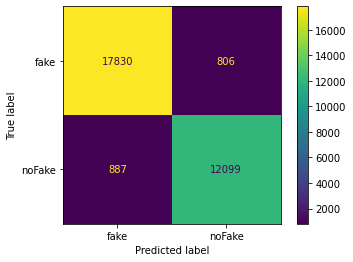

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m1.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra3

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.61 s, sys: 1.39 s, total: 3 s
Wall time: 15.3 s
CPU times: user 225 ms, sys: 465 ms, total: 691 ms
Wall time: 6.03 s
CPU times: user 253 ms, sys: 891 ms, total: 1.14 s
Wall time: 4.12 s
CPU times: user 1.5 ms, sys: 0 ns, total: 1.5 ms
Wall time: 12 ms
CPU times: user 670 µs, sys: 119 µs, total: 789 µs
Wall time: 2.12 ms
CPU times: user 1.84 ms, sys: 0 ns, total: 1.84 ms
Wall time: 2.28 ms


In [3]:
from keras.utils import to_categorical
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 5s - 5s/epoch - 5ms/step
31622
acc: 0.9476313958636392
precision: 0.9461571181818317
recall: 0.945589269002261
f1: 0.9476313958636392


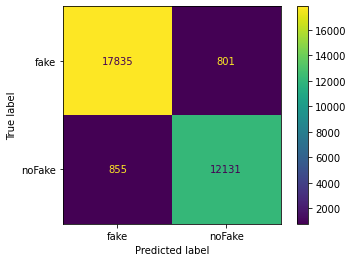

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m1.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


##Modelo 2

In [ ]:
modelo2  = crearModelo()

In [ ]:
%time X2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_train/X2_train_tensorp0.pt')
%time X2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_train/X2_train_tensorp1.pt')
%time X2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_train/X2_train_tensorp2.pt')
%time y2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_train/y2_train_tensorp0.pt')
%time y2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_train/y2_train_tensorp1.pt')
%time y2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_train/y2_train_tensorp2.pt')

CPU times: user 447 ms, sys: 1.97 s, total: 2.41 s
Wall time: 27.9 s
CPU times: user 408 ms, sys: 1.38 s, total: 1.79 s
Wall time: 27.9 s
CPU times: user 380 ms, sys: 1.39 s, total: 1.76 s
Wall time: 26.6 s
CPU times: user 1.46 ms, sys: 1.05 ms, total: 2.51 ms
Wall time: 6.38 ms
CPU times: user 1.36 ms, sys: 184 µs, total: 1.55 ms
Wall time: 2.25 ms
CPU times: user 1.4 ms, sys: 167 µs, total: 1.57 ms
Wall time: 2.29 ms


In [ ]:
from keras.utils import to_categorical

y2_trainp1 = to_categorical(y2_trainp1.cpu(), num_classes=2)
y2_trainp2 = to_categorical(y2_trainp2.cpu(), num_classes=2)
y2_trainp3 = to_categorical(y2_trainp3.cpu(), num_classes=2)

In [ ]:
history = modelo2.fit(np.asarray(X2_trainp1.cpu()), np.asarray(y2_trainp1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 3s - loss: 0.3349 - categorical_accuracy: 0.8573
Epoch 2/10
782/782 - 2s - loss: 0.1459 - categorical_accuracy: 0.9469
Epoch 3/10
782/782 - 2s - loss: 0.0925 - categorical_accuracy: 0.9698
Epoch 4/10
782/782 - 2s - loss: 0.0640 - categorical_accuracy: 0.9774
Epoch 5/10
782/782 - 4s - loss: 0.0439 - categorical_accuracy: 0.9861
Epoch 6/10
782/782 - 4s - loss: 0.0301 - categorical_accuracy: 0.9902
Epoch 7/10
782/782 - 4s - loss: 0.0205 - categorical_accuracy: 0.9939
Epoch 8/10
782/782 - 4s - loss: 0.0141 - categorical_accuracy: 0.9958
Epoch 9/10
782/782 - 4s - loss: 0.0098 - categorical_accuracy: 0.9973
Epoch 10/10
782/782 - 4s - loss: 0.0066 - categorical_accuracy: 0.9983


In [ ]:
history = modelo2.fit(np.asarray(X2_trainp2.cpu()), np.asarray(y2_trainp2)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 4s - loss: 0.2501 - categorical_accuracy: 0.9093
Epoch 2/10
782/782 - 4s - loss: 0.1118 - categorical_accuracy: 0.9574
Epoch 3/10
782/782 - 4s - loss: 0.0693 - categorical_accuracy: 0.9750
Epoch 4/10
782/782 - 4s - loss: 0.0442 - categorical_accuracy: 0.9858
Epoch 5/10
782/782 - 4s - loss: 0.0289 - categorical_accuracy: 0.9906
Epoch 6/10
782/782 - 4s - loss: 0.0191 - categorical_accuracy: 0.9939
Epoch 7/10
782/782 - 4s - loss: 0.0132 - categorical_accuracy: 0.9956
Epoch 8/10
782/782 - 4s - loss: 0.0095 - categorical_accuracy: 0.9968
Epoch 9/10
782/782 - 4s - loss: 0.0072 - categorical_accuracy: 0.9973
Epoch 10/10
782/782 - 4s - loss: 0.0057 - categorical_accuracy: 0.9976


In [ ]:
history = modelo2.fit(np.asarray(X2_trainp3.cpu()), np.asarray(y2_trainp3)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
744/744 - 3s - loss: 0.2121 - categorical_accuracy: 0.9299
Epoch 2/10
744/744 - 4s - loss: 0.0850 - categorical_accuracy: 0.9697
Epoch 3/10
744/744 - 3s - loss: 0.0494 - categorical_accuracy: 0.9831
Epoch 4/10
744/744 - 3s - loss: 0.0316 - categorical_accuracy: 0.9896
Epoch 5/10
744/744 - 4s - loss: 0.0211 - categorical_accuracy: 0.9931
Epoch 6/10
744/744 - 4s - loss: 0.0149 - categorical_accuracy: 0.9950
Epoch 7/10
744/744 - 3s - loss: 0.0111 - categorical_accuracy: 0.9960
Epoch 8/10
744/744 - 3s - loss: 0.0085 - categorical_accuracy: 0.9966
Epoch 9/10
744/744 - 3s - loss: 0.0067 - categorical_accuracy: 0.9971
Epoch 10/10
744/744 - 4s - loss: 0.0056 - categorical_accuracy: 0.9974


In [ ]:
modelo2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain60.h5')

In [1]:
from keras.models import load_model
modelo2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain60.h5')

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp2.pt')
%time X2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_val/X2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_val/X2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_val/X2_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_val/y2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_val/y2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_val/y2_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.56 s, sys: 1.48 s, total: 3.04 s
Wall time: 16.7 s
CPU times: user 255 ms, sys: 460 ms, total: 715 ms
Wall time: 12.9 s
CPU times: user 245 ms, sys: 942 ms, total: 1.19 s
Wall time: 11.4 s
CPU times: user 5.63 ms, sys: 1.31 ms, total: 6.94 ms
Wall time: 784 ms
CPU times: user 4.25 ms, sys: 2.69 ms, total: 6.93 ms
Wall time: 1.1 s
CPU times: user 5.1 ms, sys: 0 ns, total: 5.1 ms
Wall time: 782 ms
CPU times: user 100 ms, sys: 1.09 s, total: 1.19 s
Wall time: 16.7 s
CPU times: user 74.9 ms, sys: 1.09 s, total: 1.16 s
Wall time: 14.3 s
CPU times: user 40.6 ms, sys: 1.13 s, total: 1.17 s
Wall time: 14 s
CPU times: user 7.71 ms, sys: 1.71 ms, total: 9.42 ms
Wall time: 1.84 s
CPU times: user 5 ms, sys: 1.05 ms, total: 6.05 ms
Wall time: 789 ms
CPU times: user 6.09 ms, sys: 774 µs, total: 6.87 ms
Wall time: 983 ms


In [3]:
from keras.utils import to_categorical
y2_valp1 = to_categorical(y2_valp1.cpu(), num_classes=2)
y2_valp2 = to_categorical(y2_valp2.cpu(), num_classes=2)
y2_valp3 = to_categorical(y2_valp3.cpu(), num_classes=2)

y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

In [4]:
#validacion
import numpy as np
modelo2.evaluate(np.asarray(X2_valp1.cpu()), np.asarray(y2_valp1),verbose=2)
modelo2.evaluate(np.asarray(X2_valp2.cpu()), np.asarray(y2_valp2),verbose=2)
modelo2.evaluate(np.asarray(X2_valp3.cpu()), np.asarray(y2_valp3),verbose=2)

469/469 - 4s - loss: 0.3075 - categorical_accuracy: 0.9373 - 4s/epoch - 8ms/step
469/469 - 1s - loss: 0.2861 - categorical_accuracy: 0.9403 - 1s/epoch - 3ms/step
475/475 - 1s - loss: 0.3106 - categorical_accuracy: 0.9361 - 1s/epoch - 3ms/step


[0.3105714023113251, 0.9360748529434204]

In [5]:
modelo2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain60PostEvaluate.h5')

#####Probando en cada muestra

In [1]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2DenseTrain60PostEvaluate.h5')

######Muestra1

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp2.pt')


CPU times: user 1.59 s, sys: 1.37 s, total: 2.96 s
Wall time: 6.66 s
CPU times: user 249 ms, sys: 450 ms, total: 698 ms
Wall time: 3.91 s
CPU times: user 248 ms, sys: 882 ms, total: 1.13 s
Wall time: 4.09 s
CPU times: user 1.76 ms, sys: 854 µs, total: 2.62 ms
Wall time: 2.92 ms
CPU times: user 1.08 ms, sys: 36 µs, total: 1.12 ms
Wall time: 2.11 ms
CPU times: user 1.28 ms, sys: 0 ns, total: 1.28 ms
Wall time: 2.19 ms


In [3]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9486433495667573
precision: 0.9471845676863566
recall: 0.9466579401456889
f1: 0.9486433495667573


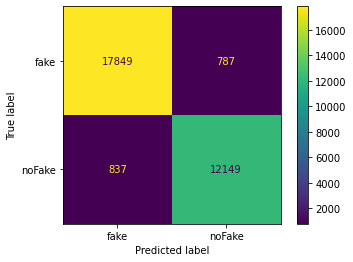

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m2.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra2

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.63 s, sys: 1.41 s, total: 3.04 s
Wall time: 6.85 s
CPU times: user 235 ms, sys: 447 ms, total: 681 ms
Wall time: 4.16 s
CPU times: user 257 ms, sys: 889 ms, total: 1.15 s
Wall time: 5 s
CPU times: user 707 µs, sys: 738 µs, total: 1.45 ms
Wall time: 12.8 ms
CPU times: user 1.59 ms, sys: 21 µs, total: 1.61 ms
Wall time: 2.38 ms
CPU times: user 1.71 ms, sys: 0 ns, total: 1.71 ms
Wall time: 2.1 ms


In [3]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9376067294921258
precision: 0.9358479876033204
recall: 0.9351581451148854
f1: 0.9376067294921258


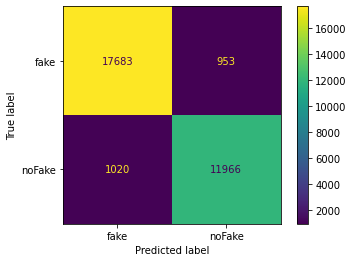

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m2.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra3

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.64 s, sys: 1.35 s, total: 3 s
Wall time: 6.74 s
CPU times: user 215 ms, sys: 474 ms, total: 689 ms
Wall time: 3.89 s
CPU times: user 265 ms, sys: 906 ms, total: 1.17 s
Wall time: 5.05 s
CPU times: user 607 µs, sys: 838 µs, total: 1.44 ms
Wall time: 11 ms
CPU times: user 272 µs, sys: 546 µs, total: 818 µs
Wall time: 1.81 ms
CPU times: user 780 µs, sys: 0 ns, total: 780 µs
Wall time: 1.86 ms


In [3]:
from keras.utils import to_categorical
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 6s - 6s/epoch - 6ms/step
31622
acc: 0.9495604326102081
precision: 0.9480612046937829
recall: 0.9476928147594482
f1: 0.9495604326102081


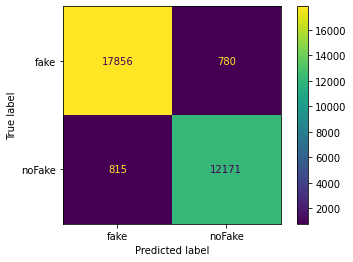

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m2.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


##Modelo 3

In [ ]:
modelo3  = crearModelo()

In [ ]:
%time X3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_train/X3_train_tensorp0.pt')
%time X3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_train/X3_train_tensorp1.pt')
%time X3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_train/X3_train_tensorp2.pt')
%time y3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_train/y3_train_tensorp0.pt')
%time y3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_train/y3_train_tensorp1.pt')
%time y3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_train/y3_train_tensorp2.pt')

CPU times: user 371 ms, sys: 1.9 s, total: 2.27 s
Wall time: 9.15 s
CPU times: user 335 ms, sys: 1.32 s, total: 1.66 s
Wall time: 24.4 s
CPU times: user 355 ms, sys: 1.24 s, total: 1.59 s
Wall time: 25.1 s
CPU times: user 4.59 ms, sys: 374 µs, total: 4.97 ms
Wall time: 3.14 s
CPU times: user 2.11 ms, sys: 943 µs, total: 3.05 ms
Wall time: 575 ms
CPU times: user 1.44 ms, sys: 692 µs, total: 2.14 ms
Wall time: 179 ms


In [ ]:
print(X3_trainp1.shape)
print(X3_trainp2.shape)
print(X3_trainp3.shape)

torch.Size([25000, 20000])
torch.Size([25000, 20000])
torch.Size([23783, 20000])


In [ ]:
from keras.utils import to_categorical

y3_trainp1 = to_categorical(y3_trainp1.cpu(), num_classes=2)
y3_trainp2 = to_categorical(y3_trainp2.cpu(), num_classes=2)
y3_trainp3 = to_categorical(y3_trainp3.cpu(), num_classes=2)

In [ ]:
history = modelo3.fit(np.asarray(X3_trainp1.cpu()), np.asarray(y3_trainp1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 3s - loss: 0.3410 - categorical_accuracy: 0.8538
Epoch 2/10
782/782 - 2s - loss: 0.1501 - categorical_accuracy: 0.9465
Epoch 3/10
782/782 - 4s - loss: 0.0976 - categorical_accuracy: 0.9671
Epoch 4/10
782/782 - 4s - loss: 0.0693 - categorical_accuracy: 0.9772
Epoch 5/10
782/782 - 4s - loss: 0.0502 - categorical_accuracy: 0.9840
Epoch 6/10
782/782 - 4s - loss: 0.0370 - categorical_accuracy: 0.9880
Epoch 7/10
782/782 - 4s - loss: 0.0272 - categorical_accuracy: 0.9914
Epoch 8/10
782/782 - 4s - loss: 0.0197 - categorical_accuracy: 0.9936
Epoch 9/10
782/782 - 4s - loss: 0.0146 - categorical_accuracy: 0.9953
Epoch 10/10
782/782 - 4s - loss: 0.0115 - categorical_accuracy: 0.9965


In [ ]:
history = modelo3.fit(np.asarray(X3_trainp2.cpu()), np.asarray(y3_trainp2)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
782/782 - 4s - loss: 0.2605 - categorical_accuracy: 0.9064
Epoch 2/10
782/782 - 4s - loss: 0.1154 - categorical_accuracy: 0.9548
Epoch 3/10
782/782 - 4s - loss: 0.0724 - categorical_accuracy: 0.9727
Epoch 4/10
782/782 - 4s - loss: 0.0464 - categorical_accuracy: 0.9826
Epoch 5/10
782/782 - 4s - loss: 0.0307 - categorical_accuracy: 0.9875
Epoch 6/10
782/782 - 4s - loss: 0.0209 - categorical_accuracy: 0.9919
Epoch 7/10
782/782 - 4s - loss: 0.0148 - categorical_accuracy: 0.9956
Epoch 8/10
782/782 - 4s - loss: 0.0108 - categorical_accuracy: 0.9969
Epoch 9/10
782/782 - 4s - loss: 0.0083 - categorical_accuracy: 0.9978
Epoch 10/10
782/782 - 4s - loss: 0.0065 - categorical_accuracy: 0.9983


In [ ]:
history = modelo3.fit(np.asarray(X3_trainp3.cpu()), np.asarray(y3_trainp3)#,validation_data=(np.asarray(X1_val),y1_val1)
                      , epochs=10, verbose=2)

Epoch 1/10
744/744 - 4s - loss: 0.2148 - categorical_accuracy: 0.9272
Epoch 2/10
744/744 - 4s - loss: 0.0918 - categorical_accuracy: 0.9649
Epoch 3/10
744/744 - 4s - loss: 0.0546 - categorical_accuracy: 0.9801
Epoch 4/10
744/744 - 4s - loss: 0.0353 - categorical_accuracy: 0.9886
Epoch 5/10
744/744 - 4s - loss: 0.0238 - categorical_accuracy: 0.9928
Epoch 6/10
744/744 - 4s - loss: 0.0165 - categorical_accuracy: 0.9952
Epoch 7/10
744/744 - 4s - loss: 0.0120 - categorical_accuracy: 0.9967
Epoch 8/10
744/744 - 4s - loss: 0.0089 - categorical_accuracy: 0.9981
Epoch 9/10
744/744 - 4s - loss: 0.0069 - categorical_accuracy: 0.9985
Epoch 10/10
744/744 - 4s - loss: 0.0055 - categorical_accuracy: 0.9989


In [ ]:
modelo3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain60.h5')

In [1]:
from keras.models import load_model
modelo3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain60.h5')

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp2.pt')
%time X3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_val/X3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_val/X3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_val/X3_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_val/y3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_val/y3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_val/y3_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.58 s, sys: 1.42 s, total: 3 s
Wall time: 17 s
CPU times: user 226 ms, sys: 456 ms, total: 683 ms
Wall time: 7.98 s
CPU times: user 252 ms, sys: 942 ms, total: 1.19 s
Wall time: 11.5 s
CPU times: user 5.89 ms, sys: 382 µs, total: 6.28 ms
Wall time: 788 ms
CPU times: user 6.57 ms, sys: 528 µs, total: 7.1 ms
Wall time: 1.12 s
CPU times: user 3.9 ms, sys: 1.57 ms, total: 5.47 ms
Wall time: 835 ms
CPU times: user 31.2 ms, sys: 885 ms, total: 916 ms
Wall time: 13.7 s
CPU times: user 67.4 ms, sys: 1.22 s, total: 1.29 s
Wall time: 20.9 s
CPU times: user 35.7 ms, sys: 1.15 s, total: 1.19 s
Wall time: 13.5 s
CPU times: user 4.8 ms, sys: 1.14 ms, total: 5.94 ms
Wall time: 759 ms
CPU times: user 4.44 ms, sys: 478 µs, total: 4.92 ms
Wall time: 780 ms
CPU times: user 4.29 ms, sys: 1.23 ms, total: 5.52 ms
Wall time: 781 ms


In [ ]:
print(X3_valp1.shape)
print(X3_valp2.shape)
print(X3_valp3.shape)
print(X3_testp1.shape)
print(X3_testp2.shape)
print(X3_testp3.shape)

torch.Size([15000, 20000])
torch.Size([15000, 20000])
torch.Size([15174, 20000])
torch.Size([10000, 20000])
torch.Size([10000, 20000])
torch.Size([11622, 20000])


In [3]:
from keras.utils import to_categorical
y3_valp1 = to_categorical(y3_valp1.cpu(), num_classes=2)
y3_valp2 = to_categorical(y3_valp2.cpu(), num_classes=2)
y3_valp3 = to_categorical(y3_valp3.cpu(), num_classes=2)

y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

In [4]:
#validacion
import numpy as np
modelo3.evaluate(np.asarray(X3_valp1.cpu()), np.asarray(y3_valp1),verbose=2)
modelo3.evaluate(np.asarray(X3_valp2.cpu()), np.asarray(y3_valp2),verbose=2)
modelo3.evaluate(np.asarray(X3_valp3.cpu()), np.asarray(y3_valp3),verbose=2)

469/469 - 4s - loss: 0.3143 - categorical_accuracy: 0.9337 - 4s/epoch - 8ms/step
469/469 - 2s - loss: 0.3253 - categorical_accuracy: 0.9313 - 2s/epoch - 3ms/step
475/475 - 1s - loss: 0.3277 - categorical_accuracy: 0.9323 - 1s/epoch - 3ms/step


[0.327725350856781, 0.9323184490203857]

In [5]:
modelo3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain60PostEvaluate.h5')

#####Probando en cada muestra

In [1]:

from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3DenseTrain60PostEvaluate.h5')

######Muestra1

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y1_test/y1_test_tensorp2.pt')


CPU times: user 1.61 s, sys: 1.36 s, total: 2.97 s
Wall time: 6.87 s
CPU times: user 242 ms, sys: 445 ms, total: 687 ms
Wall time: 3.41 s
CPU times: user 236 ms, sys: 886 ms, total: 1.12 s
Wall time: 3.87 s
CPU times: user 617 µs, sys: 1.81 ms, total: 2.43 ms
Wall time: 2.74 ms
CPU times: user 1.84 ms, sys: 0 ns, total: 1.84 ms
Wall time: 2.19 ms
CPU times: user 1.18 ms, sys: 507 µs, total: 1.69 ms
Wall time: 2.62 ms


In [3]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9438998165833913
precision: 0.9425861446032733
recall: 0.9413844377521889
f1: 0.9438998165833913


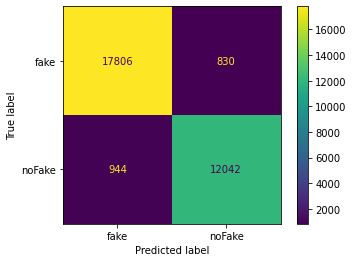

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m3.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra2

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.6 s, sys: 1.38 s, total: 2.98 s
Wall time: 6.73 s
CPU times: user 238 ms, sys: 450 ms, total: 687 ms
Wall time: 3.97 s
CPU times: user 284 ms, sys: 881 ms, total: 1.17 s
Wall time: 4.97 s
CPU times: user 1.92 ms, sys: 944 µs, total: 2.87 ms
Wall time: 7.26 ms
CPU times: user 1.35 ms, sys: 0 ns, total: 1.35 ms
Wall time: 3.82 ms
CPU times: user 1.3 ms, sys: 455 µs, total: 1.75 ms
Wall time: 3.57 ms


In [3]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.943804945923724
precision: 0.9424241946023723
recall: 0.9413623144339536
f1: 0.943804945923724


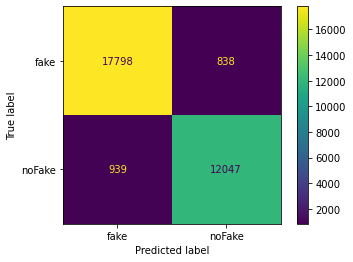

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m3.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


######Muestra3

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores60/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.57 s, sys: 1.44 s, total: 3.01 s
Wall time: 6.81 s
CPU times: user 241 ms, sys: 454 ms, total: 694 ms
Wall time: 4.1 s
CPU times: user 239 ms, sys: 936 ms, total: 1.18 s
Wall time: 4.83 s
CPU times: user 1.42 ms, sys: 0 ns, total: 1.42 ms
Wall time: 3.99 ms
CPU times: user 753 µs, sys: 0 ns, total: 753 µs
Wall time: 2.93 ms
CPU times: user 817 µs, sys: 0 ns, total: 817 µs
Wall time: 4.16 ms


In [3]:
from keras.utils import to_categorical
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 5s - 5s/epoch - 6ms/step
31622
acc: 0.9352982101068876
precision: 0.9334459864907255
recall: 0.9327910079132555
f1: 0.9352982101068876


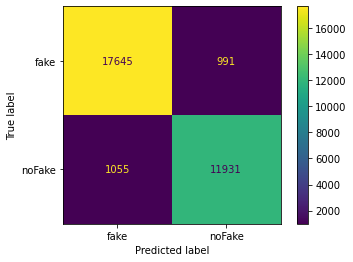

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m3.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


# Resultados



Utilizando el conjunto de prueba

Utilizando el conjunto de validacion

# Conclusiones
De un total de 150 observaciones, 4 caracteristicas y 3 etiquetas de clasificacion, se ha demostrado que el modelo presentado logra clasificar con un accuracy de 93% para el conjunto de prueba y un 100% para el conjunto de validación.
